In [30]:
from main import ANF
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tqdm

from scipy.optimize import curve_fit

sns.set_style("whitegrid")

In [31]:
countries = ['malta', 'greece', 'turkey', 'netherlands', 'france', 'germany']
# countries = pd.read_csv('data/density.csv').GEO.values

In [28]:
results = {}
for c in tqdm.tqdm(countries):
  results[c] = ANF(c.lower(), verbose=False, distance=20)

 67%|██████▋   | 4/6 [00:00<00:00,  3.69it/s]

starting convert_osm_to_roadgraph
selected network type: pedestrian
accepted highway tags: {'pedestrian': {'pedestrian', 'secondary', 'track', 'residential', 'road', 'tertiary_link', 'steps', 'path', 'primary_link', 'secondary_link', 'tertiary', 'service', 'primary', 'footway', 'living_street', 'unclassified'}, 'bicycle': {'track', 'secondary', 'road', 'residential', 'cycleway', 'tertiary_link', 'path', 'primary_link', 'secondary_link', 'tertiary', 'service', 'primary', 'living_street', 'unclassified'}, 'car': {'tertiary', 'secondary', 'residential', 'tertiary_link', 'trunk_link', 'motorway_link', 'primary_link', 'secondary_link', 'motorway', 'service', 'trunk', 'primary', 'living_street', 'unclassified'}}
opening file: ./data/france/france-highways.xml
starting read_file
no compression recognized!
starting _read_ways
0%..10%..20%..30%..40%..50%..60%..error while parsing max speed of osm way 5210511! Did not recognize: fr:rural
fallback by setting it to default value
error while parsin

 83%|████████▎ | 5/6 [05:34<01:56, 116.17s/it]

[==================================================]starting convert_osm_to_roadgraph
selected network type: pedestrian
accepted highway tags: {'pedestrian': {'residential', 'steps', 'unclassified', 'track', 'secondary', 'pedestrian', 'footway', 'tertiary', 'primary', 'primary_link', 'secondary_link', 'living_street', 'path', 'service', 'road', 'tertiary_link'}, 'bicycle': {'residential', 'unclassified', 'track', 'secondary', 'tertiary', 'primary', 'primary_link', 'secondary_link', 'living_street', 'path', 'service', 'cycleway', 'road', 'tertiary_link'}, 'car': {'trunk', 'residential', 'motorway', 'unclassified', 'secondary', 'trunk_link', 'motorway_link', 'tertiary', 'primary', 'primary_link', 'secondary_link', 'living_street', 'service', 'tertiary_link'}}
opening file: ./data/germany/germany-highways.xml
starting read_file
no compression recognized!
starting _read_ways
0%..10%..20%..30%..40%..error while parsing max speed of osm way 4782205! Did not recognize: de:urban
fallback by se

100%|██████████| 6/6 [11:43<00:00, 117.19s/it]


In [32]:
results['malta']

{'r': 7,
 'k': 128,
 'max_distance': 20,
 'neighbourhoods': [134.0,
  586.1729613400045,
  1092.9433726416137,
  1630.319618738531,
  2193.2557372341566,
  2821.640717149424,
  3487.312105442117,
  4203.067046822668,
  4994.843846039055,
  5820.462410731491,
  6654.200073486785,
  7507.6682106844355,
  8376.991181495743,
  9255.72987652187,
  10186.009090552436,
  11132.82283702821,
  12095.724452312259,
  12909.318399009759,
  13621.287927941363,
  14184.67804386118],
 'mean_individual_neighbourhoods': [1.0,
  4.374425084626899,
  8.156293825683685,
  12.166564318944262,
  16.36758012861311,
  21.057020277234507,
  26.02471720479192,
  31.366171991213943,
  37.27495407491832,
  43.436286647249936,
  49.658209503632726,
  56.02737470660026,
  62.51485956340107,
  69.07261101881993,
  76.01499321307787,
  83.08076744050904,
  90.26660039039,
  96.33819700753551,
  101.6514024473236,
  105.85580629747149],
 'time_in_ms': 13.066776,
 'bitmask_length': 15,
 'nodes': 134,
 'edges': 382}

In [36]:
# Largest and smalles networks
sort = sorted(results.items(), key=lambda x: x[1]['edges'])

def print_network_info(network):
  print(network[0], network[1]['edges'], network[1]['nodes'])

# Print smallest info
print_network_info(sort[0])

# Print largest info
print_network_info(sort[-1])

malta 382 134
france 190004 64953


<AxesSubplot:>

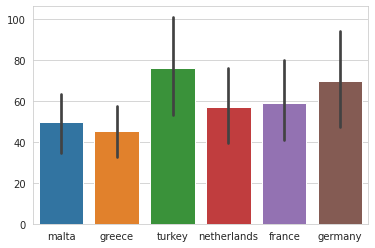

In [33]:
mean_IN = { c: results[c]['mean_individual_neighbourhoods'] for c in results.keys() }
mean_IN_df = pd.DataFrame(mean_IN)

sns.barplot(data=mean_IN_df)

       malta     greece     turkey  netherlands     france    germany
1   1.000000   1.000000   1.000000     1.000000   1.000000   1.000000
2   4.374425   3.864308   4.455595     4.445011   4.429351   4.265040
3   8.156294   7.196254   8.995942     8.289448   8.194958   8.009038
4  12.166564  11.418444  14.595291    12.576427  12.398700  12.511262
5  16.367580  16.046411  20.932768    17.401932  17.122961  17.705996


Text(0, 0.5, 'mean individual neighbourhoods size')

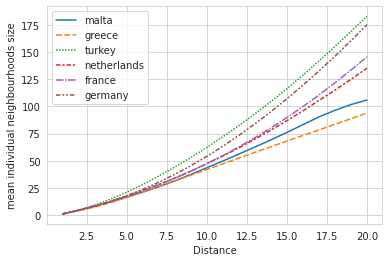

In [34]:
mean_IN = { c: results[c]['mean_individual_neighbourhoods'] for c in results.keys() }
mean_IN_df = pd.DataFrame(mean_IN)
mean_IN_df.index += 1

print(mean_IN_df.head())
sns.lineplot(data=mean_IN_df)
plt.xlabel('Distance')
plt.ylabel('mean individual neighbourhoods size')

In [42]:
# Compute hop exponent for all results
def get_hop_exponent_per_country(results):
  hop_exp = {}
  for c in results.keys():
    hop_exp[c] = get_exponent(results[c]['neighbourhoods'])
  return hop_exp

def get_exponent(neighbourhoods):
  x = np.arange(0, len(neighbourhoods))

  (a, b, c), pcov = curve_fit(func, x, neighbourhoods)
  return b

# Example function to fit to
def func(x, a, b, c):
    return a * x**b + c

exponents = get_hop_exponent_per_country(results)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 9 to 36
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GEO                    6 non-null      object 
 1   Density per square km  6 non-null      float64
 2   Hop Exponent           6 non-null      float64
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes
None
            GEO  Density per square km  Hop Exponent
9        France                  106.1      1.570843
4       Germany                  235.2      1.624618
7        Greece                   82.4      1.100944
17        Malta                 1595.1      1.234651
18  Netherlands                  507.3      1.452461


<AxesSubplot:xlabel='Density per square km', ylabel='Hop Exponent'>

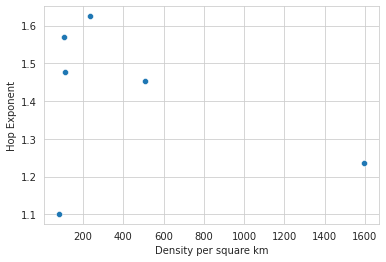

In [59]:
# Find out correlation between population density and mean individual neighbourhood size
df = pd.read_csv('data/density.csv')
df = df.sort_values('GEO')
df = df.loc[df['GEO'].str.lower().isin(countries)]
df['Density per square km'] = df['Density per square km'].astype(float)
df['Hop Exponent'] = [v for k, v in sorted(exponents.items(), key=lambda x: x[0])]

print(df.info())
print(df.head())

sns.scatterplot(data=df, x='Density per square km', y='Hop Exponent')